[0.122, -0.476, -0.634, -0.517, -0.127, 0.319, 0.607, 0.631, 0.608, 0.19, -0.386, -1.151, -1.558, -1.359, -1.397, -1.642, -1.904, -2.192, -1.781, -1.329, -1.03, -0.397, 0.199, 0.698, 0.713, 0.0, -0.893, -1.76, -2.176, -2.068, -2.423, -3.689, -5.042, -5.955, -6.309, -6.661, -7.145, -7.582, -7.919, -8.369, -8.969, -9.5, -10.045, -10.45, -10.893, -11.056, -11.276, -11.625, -11.63, -11.746, -12.011, -12.54, -12.832, -12.815, -12.515, -12.156, -11.921, -11.891, -11.667, -11.651, -12.164, -12.584, -12.783, -12.523, -12.325, -12.184, -12.389, -12.292, -11.661, -11.09, -10.805, -11.159, -11.501, -12.035, -12.806]
[13.1217, 13.655, 13.9517, 13.8492, 13.6767, 13.0925, 11.7217, 9.78083, 8.22417, 7.29, 6.23167, 4.77, 3.39167, 2.235, 1.48833, 1.22917, 1.26667, 0.660833, 0.510833, 1.06583, 1.46333, 1.24667, 0.969167, 0.585, 0.243333, 0.0, 0.00166667, 0.831667, 2.43417, 4.4475, 5.62583, 5.33083, 4.36167, 3.40167, 3.02833, 3.51167, 3.42417, 2.81833, 2.3925, 1.90333, 1.53, 0.994167, 0.203333, -0.5625, 

/var/folders/93/sp1x4ytn2mj_zkqd4_1gfdqr0000gn/T/ipykernel_38379/112328611.py:101: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


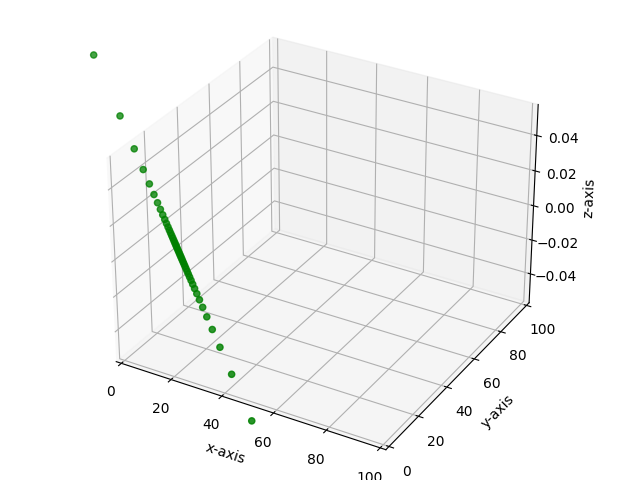

In [1]:
import os
import sys
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.mosh import *
from src.mosh import rot as R
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import csv

file = open('./data.csv')

type(file)

csvreader = csv.reader(file)

header = []
header = next(csvreader)
header

rows = []
roll = []
pitch = []
yaw = []
flag = 0
for row in csvreader:
    if flag == 0:
        pass
    else:
        rows.append(row)
        roll.append(float(rows[-1][3]))
        pitch.append(float(rows[-1][2]))
        yaw.append(float(rows[-1][1]))
    flag+=1

print(roll)
print(pitch)
print(yaw)

def plot_angles(roll, pitch, yaw):
    t_lis = np.linspace(-0.5, 1., len(roll))
    fig_ang = plt.figure()
    axes = fig_ang.add_subplot(1,1,1)
    axes.plot(t_lis, roll, label='R', color = 'orange')
    axes.plot(t_lis, pitch, label='P', color = 'blue')
    axes.plot(t_lis, yaw, label='Y', color = 'red')
    axes.legend(loc=9)
    plt.xlabel('t [sec]')
    plt.ylabel('Angle [degree]')
    plt.savefig('./plots/angles.pdf')
    return 0

plot_angles(roll, pitch, yaw)

m = Symbol('m')

p_0 = [0., 0., 0.]
d = [1., 1., 0.]
r_e_H = r_e_h(p_0, d, m)

phi = 0. #Roll
theta = 0. #Pitch
# psi = 0. #Yaw
degree = False
xs = []
ys = []
zs = []
x0, y0 = 20.*np.sqrt(2), 20.*np.sqrt(2)
for psi in np.linspace(-0.5*np.pi, 0.5*np.pi, 50):
    
    r = R(phi, theta, psi, degree)
    r_e_I = np.matmul(r, r_e_H)
    mul = solve_m(x0, y0, r_e_I, m)
#     print(mul)
    r_e = lambdify(m, r_e_I)
    r_ = np.array(r_e(mul[m]))
    xs.append(r_[0][0])
    ys.append(r_[1][0])
    zs.append(r_[2][0])
#     xs.append(0.)
#     print(r_)
    

#------------------------------------------

# creating 3d plot using matplotlib 
# in python
  
# for creating a responsive plot
%matplotlib widget
  
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
  
# creating figure
fig = plt.figure()
ax = Axes3D(fig)

# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

# creating the plot
plot_geeks = ax.scatter(xs, ys, zs, color='green')

plt.xlim([0., 100.])
plt.ylim([0., 100.])
# displaying the plot
plt.show()


/var/folders/93/sp1x4ytn2mj_zkqd4_1gfdqr0000gn/T/ipykernel_35453/2576842276.py:92: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


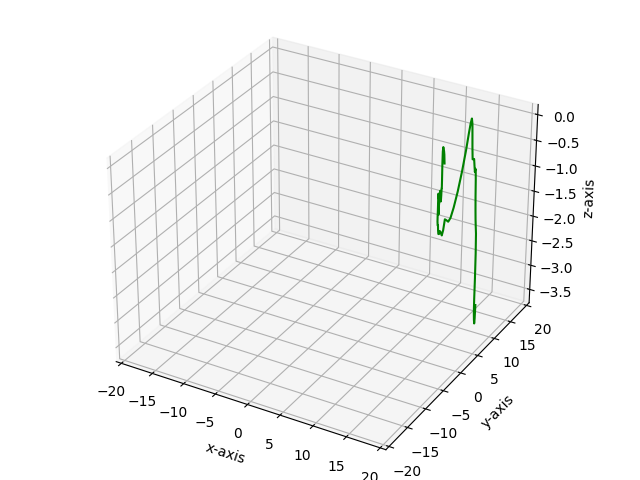

In [15]:
import os
import sys
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.mosh import *
from src.mosh import rot as R
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import csv

file = open('./data2.csv')

type(file)

csvreader = csv.reader(file)

header = []
header = next(csvreader)
header

rows = []
roll = []
pitch = []
yaw = []
flag = 0
for row in csvreader:
    if flag == 0:
        pass
    else:
        rows.append(row)
        roll.append(float(rows[-1][3]))
        pitch.append(float(rows[-1][2]))
        yaw.append(float(rows[-1][1]))

    flag+=1

# print(roll)
# print(pitch)
# print(yaw)

m = Symbol('m')

p_0 = [0., 0., 0.]
d = [1., 1., 0.]
r_e_H = r_e_h(p_0, d, m)

# phi = 0. #Roll
# theta = 0. #Pitch
# psi = 0. #Yaw
degree = True
xs = []
ys = []
zs = []
x0, y0 = 20.*np.sqrt(2), 20.*np.sqrt(2)

for i in range(len(roll)):
    phi = roll[i]
    theta = pitch[i]
    psi = yaw[i]
    r = R(phi, theta, psi, degree)
    r_e_I = np.matmul(r, r_e_H)
    mul = solve_m(x0, y0, r_e_I, m)
#     print(mul)
    r_e = lambdify(m, r_e_I)
    r_ = np.array(r_e(mul[m]))
    xs.append(r_[0][0])
    ys.append(r_[1][0])
    zs.append(r_[2][0])
#     xs.append(0.)
#     print(r_)
    
# print(xs,'\n')
# print(ys,'\n')
# print(zs)
#------------------------------------------

# creating 3d plot using matplotlib 
# in python
  
# for creating a responsive plot
%matplotlib widget
  
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
  
# creating figure
fig = plt.figure()
ax = Axes3D(fig)

# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

# creating the plot
plot_geeks = ax.plot(xs, ys, zs, color='green')

plt.xlim([-20., 20.])
plt.ylim([-20., 20.])

# displaying the plot
plt.show()



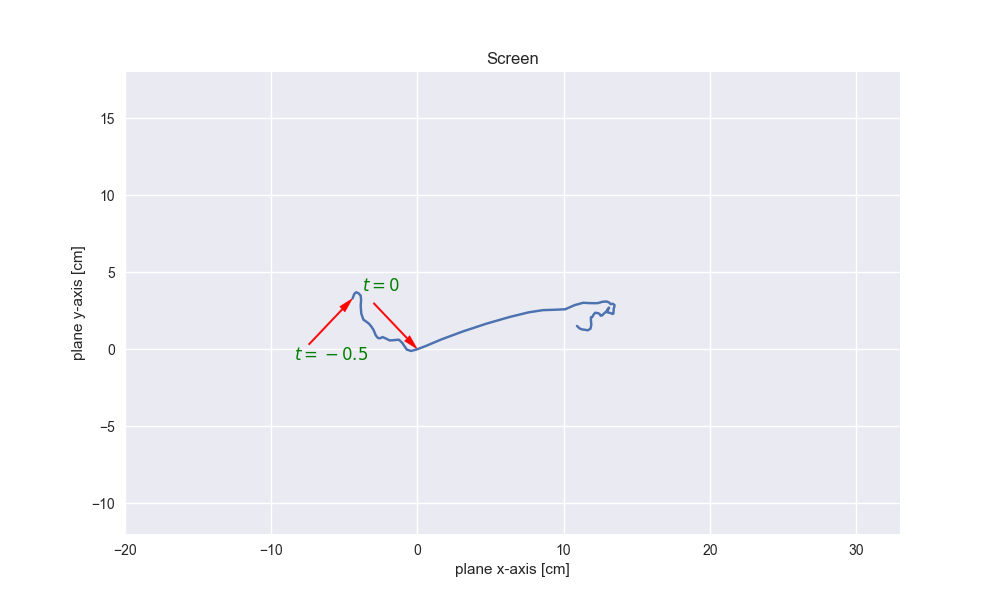

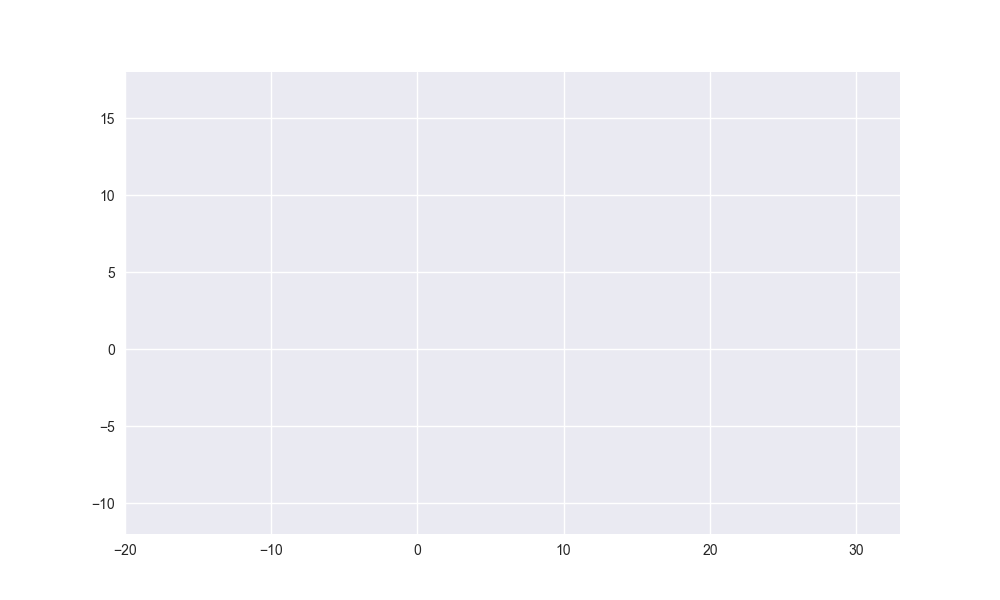

In [17]:
import random
import matplotlib
from matplotlib import animation
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
from matplotlib.animation import FuncAnimation
from itertools import count
%matplotlib widget

# Rotating the plane
rot_ang = np.arcsin(y0/np.sqrt(x0**2 + y0**2))
# print(np.sin(rot_ang)**2)

rot_ax = np.array([0., 0., 1.])
# print(np.cross(rot_ax, v_in))

x_p = []
y_p = []

for i in range(len(xs)):
    
    v_in = np.array([xs[i], ys[i], zs[i]])
    # print(v_in)

    v_fin = v_in*np.cos(rot_ang) + np.cross(rot_ax, v_in)*np.sin(rot_ang) + rot_ax*(np.dot(rot_ax, v_in))*(1 - np.cos(rot_ang))
    
    x_p.append(-v_fin[0]) #minus sign if looking from mouse perspective. 
    y_p.append(-v_fin[2]) #minus sign if looking from mouse perspective.

ind = np.where(np.array(roll)==0.0)[0][0]
fig1 = plt.figure(figsize=(10,6))
axes = fig1.add_subplot(1,1,1)
# circ = plt.Circle((x_p[30], y_p[30]), radius=2., color='r', fill=False, visible=True, lw=0.85)
# axes.add_artist(circ)
plt.plot(x_p, y_p)
dx, dy = -3., -3.
plt.arrow(x_p[ind]+dx, y_p[ind]-dy, -dx, dy, width=0.1, color='r', length_includes_head=True, head_width=0.5, head_length=1.)
plt.text(x_p[ind]+dx-0.8, y_p[ind]-dy+0.8, r'$t = 0.$', color='green', size='large')
plt.arrow(x_p[0]+dx, y_p[0]+dy, -dx, -dy, width=0.1, color='r', length_includes_head=True, head_width=0.5, head_length=1.)
plt.text(x_p[0]+dx-1., y_p[0]+dy-1., r'$t = - 0.5$', color='green', size='large')
plt.xlabel('plane x-axis [cm]')
plt.ylabel('plane y-axis [cm]')
plt.ylim(-12., 18.)
plt.xlim(-20., 33)
plt.title('Screen')
plt.savefig('./plots/cell1.pdf', format='pdf')
# displaying the plot
plt.show()


fig = plt.figure(figsize=(10,6))
axes = fig.add_subplot(1,1,1)
axes.set_ylim(-12., 18.)
axes.set_xlim(-20., 33)
plt.style.use("seaborn")
x,y=[],[]

def animate(i):
    if i<len(x_p):
        x.append(x_p[i]) 
        y.append(y_p[i])
        dx, dy = -3., -3.
        plt.arrow(x_p[ind]+dx, y_p[ind]-dy, -dx, dy, width=0.1, color='r', length_includes_head=True, head_width=0.5, head_length=1.)
        plt.text(x_p[ind]+dx-0.8, y_p[ind]-dy+0.8, r'$t = 0.$', color='green', size='large')
        plt.arrow(x_p[0]+dx, y_p[0]+dy, -dx, -dy, width=0.1, color='r', length_includes_head=True, head_width=0.5, head_length=1.)
        plt.text(x_p[0]+dx-1., y_p[0]+dy-1., r'$t = - 0.5$', color='green', size='large')
        plt.xlabel('plane x-axis [cm]')
        plt.ylabel('plane y-axis [cm]')
        plt.title('Screen')
        plt.plot(x,y, scaley=True, scalex=True, color="blue")

# ani = FuncAnimation(fig=fig, func=animate, interval=20)
# f = r"./plots/animation1.gif" 
# writergif = animation.PillowWriter(fps=15) 
# ani.save(f, writer=writergif)




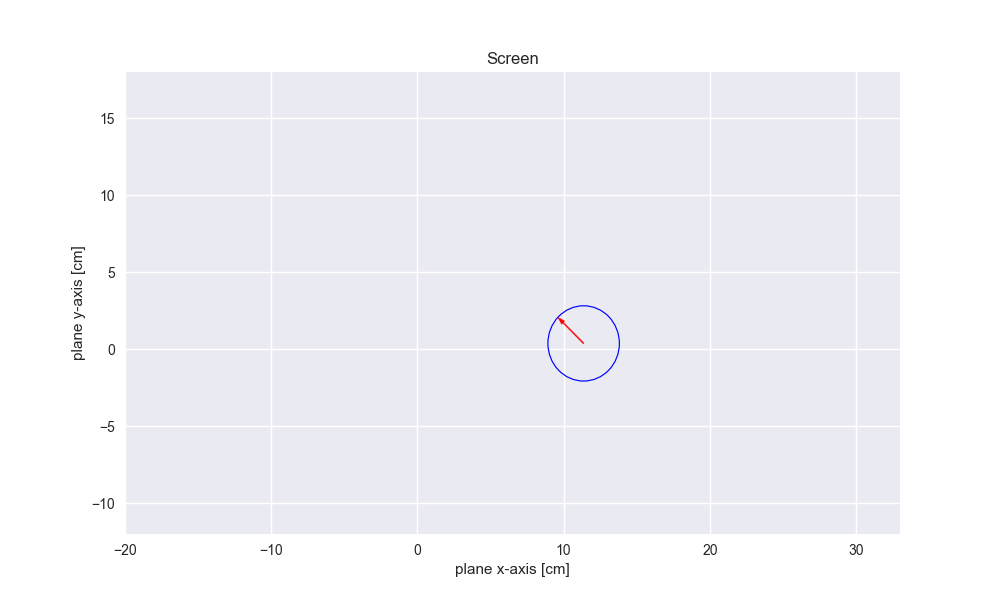

In [3]:
fig2 = plt.figure(figsize=(10,6))
axes = fig2.add_subplot(1,1,1)



x, y, u, v = [], [], [], []
def animate(i):
    if i<len(x_p)-1:
    #     x.append(x_p[i])
    #     y.append(y_p[i])
    #     u.append(x_p[i+1]-x_p[i])
    #     v.append(y_p[i+1]-y_p[i])
        x = x_p[i]
        y = y_p[i]
        u = 10*float(x_p[i+1]-x_p[i])
        v = 10*float(y_p[i+1]-y_p[i])
        axes.clear()
        axes.set_ylim(-12., 18.)
        axes.set_xlim(-20., 33)
        plt.style.use("seaborn")
        plt.xlabel('plane x-axis [cm]')
        plt.ylabel('plane y-axis [cm]')
        plt.title('Screen')
        plt.arrow(x, y, u, v, width=0.07, color='r', length_includes_head=True, head_width=0.3, head_length=0.5)
        circ = plt.Circle((x, y), radius=np.hypot(u,v), color='b', fill=False, visible=True, lw=0.85)
        axes.add_artist(circ)
#         plt.plot(x,y, scaley=True, scalex=True, color="blue")
#         plt.quiver([x, y], u, v)

ani = FuncAnimation(fig=fig2, func=animate, interval=20)
f = r"./plots/animation_vector_field.gif" 
writergif = animation.PillowWriter(fps=15) 
ani.save(f, writer=writergif)

# fig = plt.figure(figsize=(10,6))
# axes = fig.add_subplot(1,1,1)
# axes.set_ylim(-12., 18.)
# axes.set_xlim(-20., 33)
# plt.style.use("seaborn")
# x,y=[],[]

# def animate(i):
#     if i<len(x_p):
#         x.append(x_p[i]) 
#         y.append(y_p[i])
#         dx, dy = -3., -3.
#         plt.arrow(x+dx, y-dy, -dx, dy, width=0.1, color='r', length_includes_head=True, head_width=0.5, head_length=1.)
#         plt.text(x_p[ind]+dx-0.8, y_p[ind]-dy+0.8, r'$t = 0.$', color='green', size='large')
#         plt.arrow(x_p[0]+dx, y_p[0]+dy, -dx, -dy, width=0.1, color='r', length_includes_head=True, head_width=0.5, head_length=1.)
#         plt.text(x_p[0]+dx-1., y_p[0]+dy-1., r'$t = - 0.5$', color='green', size='large')
#         plt.xlabel('plane x-axis [cm]')
#         plt.ylabel('plane y-axis [cm]')
#         plt.title('Screen')
#         plt.plot(x,y, scaley=True, scalex=True, color="blue")

# ani = FuncAnimation(fig=fig, func=animate, interval=20)
# f = r"./plots/animation_vector_field.gif" 
# writergif = animation.PillowWriter(fps=15) 
# ani.save(f, writer=writergif)


### Polar and velocity plots

In [2]:
import os
import sys
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.mosh import *
from src.mosh import rot as R
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import csv

def plane_data(name, L):

    L_data1 = np.loadtxt('./dat/'+name+'/'+name+'_1.txt')
    L_data2 = np.loadtxt('./dat/'+name+'/'+name+'_4.txt')

    D_data1 = np.loadtxt('./dat/'+name+'/'+name+'_2.txt')
    D_data2 = np.loadtxt('./dat/'+name+'/'+name+'_3.txt')

    L_data = (L_data1 + L_data2)/2.
    D_data = (D_data1 + D_data2)/2.
    
    if L==True:
        data = L_data
    else:
        data = D_data

    roll = []
    pitch = []
    yaw = []

    for i in range(len(data[0])):

        yaw.append(float(data[0][i]))
        pitch.append(float(data[1][i]))
        roll.append(float(data[2][i])) 

    # print(roll)
    # print(pitch)
    # print(yaw)

    m = Symbol('m')

    p_0 = [1., 1., 1.]
    d = [1., 1., 0.]
    r_e_H = r_e_h(p_0, d, m)

    degree = True
    xs = []
    ys = []
    zs = []
    x0, y0 = 20.*np.sqrt(2), 20.*np.sqrt(2)

    for i in range(len(roll)):
        phi = roll[i]
        theta = pitch[i]
        psi = yaw[i]
        r = R(phi, theta, psi, degree)
        r_e_I = np.matmul(r, r_e_H)
        mul = solve_m(x0, y0, r_e_I, m)
    #     print(mul)
        r_e = lambdify(m, r_e_I)
        r_ = np.array(r_e(mul[m]))
        xs.append(r_[0][0])
        ys.append(r_[1][0])
        zs.append(r_[2][0])
    #     xs.append(0.)
    #     print(r_)

    # print(xs,'\n')
    # print(ys,'\n')
    # print(zs)

    # Rotating the plane
    rot_ang = np.arcsin(y0/np.sqrt(x0**2 + y0**2))
    # print(np.sin(rot_ang)**2)

    rot_ax = np.array([0., 0., 1.])
    # print(np.cross(rot_ax, v_in))

    x_p = []
    y_p = []

    for i in range(len(xs)):

        v_in = np.array([xs[i], ys[i], zs[i]])
        # print(v_in)

        v_fin = v_in*np.cos(rot_ang) + np.cross(rot_ax, v_in)*np.sin(rot_ang) + rot_ax*(np.dot(rot_ax, v_in))*(1 - np.cos(rot_ang))

        x_p.append(-v_fin[0]) #minus sign if looking from mouse perspective. 
        y_p.append(-v_fin[2]) #minus sign if looking from mouse perspective.

    return x_p, y_p


def make_polar_plot(x_p, y_p, name, L, init_t, fin_t):
    
    if L==True:
        light = 'light'
    else:
        light = 'dark'
    
    r = []
    thet = []
    u_list = []
    v_list = []
    for i in range(len(x_p)-1):
        u = float(x_p[i+1]-x_p[i])
        v = float(y_p[i+1]-y_p[i])
        u_list.append(u)
        v_list.append(v)
        r.append(np.sqrt(u**2 + v**2))
        thet.append(np.arctan2(v, u))

    avg_vel_mod = [0., np.max(r)] #8*np.sqrt(np.mean(u_list)**2 + np.mean(v_list)**2)]
    avg_vel_ang = [0., np.arctan2(np.mean(v_list[init_t:fin_t]), np.mean(u_list[init_t:fin_t]))]

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.scatter(thet[0:24], r[0:24], label='$-0.5 < t < 0.$')
    ax.scatter(thet[25:49], r[25:49], label='$0. < t < 0.5$')
    ax.scatter(thet[50:], r[50:], label='$0.5 < t < 1.$')
    ax.plot(avg_vel_ang, avg_vel_mod, color='r', linewidth=2, linestyle='dashed', label='Average angle in '+light+': '+str(round(avg_vel_ang[1]*180/np.pi, 2))+' degrees')
    ax.legend(loc=9)
    ax.grid(True)
    ax.set_title("Distribution of projected eye movement velocity on the screen - "+name, va='bottom')
    plt.savefig('./plots/polar/'+name+'_'+light+'.svg', format='svg')
    plt.close()
    return round(avg_vel_ang[1]*180/np.pi, 3)



cell_list = !ls ./dat
# print(cell_list)
angles = []

init_t = 24
fin_t = 74
for i in range(len(cell_list)):
    
    name = cell_list[i]
    
    L = True
    x_p, y_p = plane_data(name, L)
    angles.append([name, 'light', make_polar_plot(x_p, y_p, name, L, init_t, fin_t)])
    
    L = False
    x_p, y_p = plane_data(name, L)
    angles.append([name, 'dark', make_polar_plot(x_p, y_p, name, L, init_t, fin_t)])
    
print(angles)


[['NewM1_3_11', 'light', 5.856], ['NewM1_3_11', 'dark', 24.44], ['NewM1_4_11', 'light', -61.847], ['NewM1_4_11', 'dark', 7.688], ['NewM1_4_21', 'light', -141.732], ['NewM1_4_21', 'dark', -156.24], ['NewM1_8_41', 'light', 40.244], ['NewM1_8_41', 'dark', 135.396], ['NewM4_4_31', 'light', -6.187], ['NewM4_4_31', 'dark', 40.575], ['NewM4_9_21', 'light', -14.231], ['NewM4_9_21', 'dark', -15.383], ['NewM5_11_11', 'light', -38.762], ['NewM5_11_11', 'dark', -15.727], ['NewM5_1_32', 'light', 137.279], ['NewM5_1_32', 'dark', 23.626], ['NewM5_1_41', 'light', 139.794], ['NewM5_1_41', 'dark', 61.576], ['NewM5_6_11', 'light', -37.689], ['NewM5_6_11', 'dark', -28.452], ['NewM5_6_32', 'light', 20.918], ['NewM5_6_32', 'dark', -2.249], ['NewM5_8_22', 'light', -159.059], ['NewM5_8_22', 'dark', 27.084], ['Vgat1_2_41', 'light', 8.786], ['Vgat1_2_41', 'dark', 17.656], ['Vgat1_3_24', 'light', 154.17], ['Vgat1_3_24', 'dark', -175.292], ['Vglut2_4_31', 'light', 17.989], ['Vglut2_4_31', 'dark', 15.064], ['Vglut

## Eye movement correction

dt =  0.016666203883674867
dt =  0.016666666666666607
bins =  36014


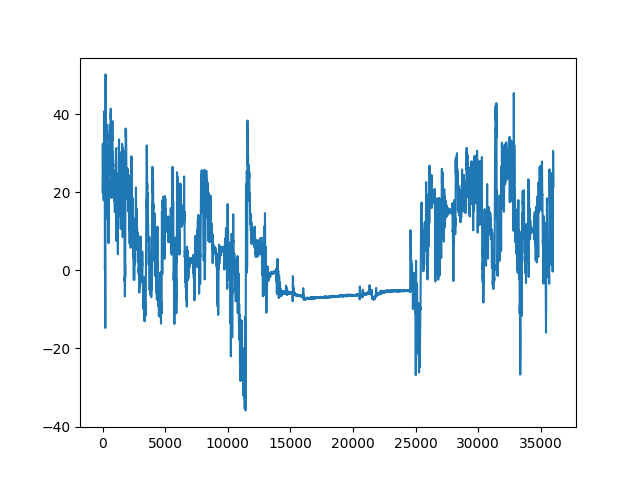

In [9]:
import os
import sys
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.mosh import *
from src.mosh import rot as R
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import csv
import random
import matplotlib
from matplotlib import animation
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
from matplotlib.animation import FuncAnimation
from itertools import count
from matplotlib import cm
from scipy.interpolate import interp1d, interp2d, griddata
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget


def interp_eye_mov(h_p_data, v_p_data, pitch, labl):
    f = interp1d(h_p_data[0], h_p_data[1]) # Horizontal data
    f2 = interp1d(v_p_data[0], v_p_data[1]) # Vertical data
    xnew = np.linspace(np.min(h_p_data[0]), np.max(h_p_data[0]), num=45, endpoint=True)
    xnew2 = np.linspace(np.min(v_p_data[0]), np.max(v_p_data[0]), num=45, endpoint=True)
    plt.plot(h_p_data[0], h_p_data[1], 'o', v_p_data[0], v_p_data[1], 'o', xnew, f(xnew), '-', xnew2, f2(xnew2), '--')
    plt.legend(['horiz. data', 'vert. data', 'horiz. fit', 'vert. fit'], loc='best')
    plt.title(labl + " correction")
    plt.xlabel(labl + "[degrees]")
    plt.ylabel("Right eye movement[degrees]")
    plt.savefig("./plots/eye_corr_" + labl + ".svg")
    plt.close()
    
    if pitch >= np.min(h_p_data[:][0]) and pitch <= np.max(h_p_data[:][0]):
        h_p_out = f(pitch)
    else:
        print(labl + " is out of range, so zero horizontal correction!")
        h_p_out = 0.
        
    if pitch >= np.min(v_p_data[:][0]) and pitch <= np.max(v_p_data[:][0]):
        v_p_out = f2(pitch)
    else:
        print(labl + " is out of range, so zero vertical correction!")
        v_p_out = 0.
    
    return h_p_out, v_p_out


def eye_mov_corr(r_e_H, pitch, roll):
    
    h_p = np.array(np.loadtxt("eye_mov_data/Pitch_h.txt")).T
    v_p = np.array(np.loadtxt("eye_mov_data/Pitch_v.txt")).T

    h_r = np.array(np.loadtxt("eye_mov_data/Roll_h.txt")).T
    v_r = np.array(np.loadtxt("eye_mov_data/Roll_v.txt")).T

    pitch_h, pitch_v = interp_eye_mov(h_p, v_p, pitch, labl='Pitch')
    roll_h, roll_v = interp_eye_mov(h_r, v_r, roll, labl='Roll')
    
########################################################################
import os.path as op

def get_eye_axis_azimuth_elevation(eye_model='sakatani+isa'):
    """eye axis azimuth/elevation (Sakatani & Isa (2007) or Oommen & Stahl (2008))"""

    assert eye_model in ['oommen+stahl', 'sakatani+isa']

    if eye_model == 'oommen+stahl':
        azimuth = 64.
        elevation = 22.
    else:
        azimuth = 60.
        elevation = 30.

    return azimuth, elevation

def rotation_matrix(theta, axis='x'):
    """3D rotation matrix around on of the Cartesian axes (x/y/z)"""

    assert axis in ['x', 'y', 'z']

    rad = np.deg2rad(theta)
    c, s = np.cos(rad), np.sin(rad)

    if axis == 'x':
        R = np.array([[1, 0, 0],
                      [0, c, -s],
                      [0, s, c]])
    elif axis == 'y':
        R = np.array([[c, 0, s],
                      [0, 1, 0],
                      [-s, 0, c]])
    elif axis == 'z':
        R = np.array([[c, -s, 0],
                      [s, c, 0],
                      [0, 0, 1]])

    return R


def Rx(theta):
    return rotation_matrix(theta, 'x')


def Ry(theta):
    return rotation_matrix(theta, 'y')


def Rz(theta):
    return rotation_matrix(theta, 'z')

def load_data():
    # get head tilt and eye position data as Python dictionary

    data_file = './eye_mov_data/meyer_etal/data/example_freely_moving.npy'
    arr = np.load(data_file)

    # wrap into a dict
    data = {'timestamps': arr[:, 0],
            'pitch': arr[:, 1],
            'roll': arr[:, 2],
            'angular_head_velocity': {'pitch': arr[:, 3],
                                      'roll': arr[:, 4],
                                      'yaw': arr[:, 5]},
            'pupil': {'left': arr[:, [6, 7]],  # [horiz, vert]
                      'right': arr[:, [8, 9]]}}  # [horiz, vert]
    return data


data = load_data()
# print(data['angular_head_velocity']['yaw'])
print('dt = ', (max(data['timestamps'])-min(data['timestamps']))/len(data['timestamps']))
print('dt = ', data['timestamps'][1]-data['timestamps'][0])
print('bins = ', len(data['timestamps']))

pup_right_h = []
pup_right_v = []
pi = []
ro = []
points = []
for i in range(len(data['pupil']['right'])):
    if np.isnan(data['pupil']['right'][i][0]) or np.isnan(data['pupil']['right'][i][0]):
        continue
    
    pup_right_h.append(data['pupil']['right'][i][0])
    pup_right_v.append(data['pupil']['right'][i][1])
    pi.append(data['pitch'][i])
    ro.append(data['roll'][i])
    points.append([data['pitch'][i], data['roll'][i]])

# hor_2d = interp2d(pi, ro, pup_right_h) # Horizontal data
# print(pup_right_h[0])
# print(hor_2d(pi[0], ro[0]))
# ver_2d = interp2d(pi, ro, pup_right_v) # Vertical data



#################

# grid_x, grid_y = np.mgrid[np.min(pi):np.max(pi):100j, np.min(ro):np.max(ro):200j]
# hor_2d = griddata(points, pup_right_h, (grid_x, grid_y), method='nearest')
# ver_2d = griddata(points, pup_right_v, (grid_x, grid_y), method='nearest')
# grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
# grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')
# plt.imshow(hor_2d)

#################

# print(data['pupil']['right'][8765][:])
# print(np.argwhere(np.isnan(pup_right_h)))
plt.plot(data['roll'])

pnew = np.linspace(np.min(pi), np.max(pi), num=1000, endpoint=True)
rnew = np.linspace(np.min(ro), np.max(ro), num=1000, endpoint=True)

# # creating figure
# fig = plt.figure()
# ax = Axes3D(fig)

# # setting title and labels
# ax.set_title("3D plot")
# ax.set_xlabel('Pitch[degrees]')
# ax.set_ylabel('Roll[degrees]')
# ax.set_zlabel('Eye Position [degrees]')

# # creating the plot
# # plot_geeks = ax.plot(pnew, rnew, hor_2d(pnew, rnew), 'bo', pnew, rnew, ver_2d(pnew, rnew), 'ro')
# plot_geeks = ax.plot(pi, ro, pup_right_h, 'bo', pi, ro, pup_right_v, 'ro')

# plt.xlim([1.2*np.min(pi), 1.2*np.max(pi)])
# plt.ylim([1.2*np.min(ro), 1.2*np.max(ro)])
# plt.savefig("./plots/h_v_interp.png")
# # displaying the plot
# #     plt.show()
# plt.close()

def interp2d_eye_mov(pitch, roll, labl):
    
    if pitch >= np.min(pi) and pitch <= np.max(pi) and roll >= np.min(ro) and roll <= np.max(ro):
        h_out = hor_2d(pitch, roll)
        v_out = ver_2d(pitch, roll)
    else:
        print("Angle out of range, so zero correction!")
        h_out = 0.
        v_out = 0.
    
    return h_out, v_out


eye_model='sakatani+isa'

azimuth, elevation = get_eye_axis_azimuth_elevation(eye_model)

R_eye_in_head = {}
for eye in ['left', 'right']:
    # +- 1 for left/right eye axes
    s = 1 if eye == 'left' else -1
    R_eye_in_head[eye] = np.dot(Rz(s * azimuth), Rx(elevation))
    
# the eye axis is initially aligned with the temporal-to-nasal axis (y-axis; see above)
eye_axis = np.array([0, 1, 0])

# for j, (pitch, roll) in enumerate(zip(data['pitch'], data['roll'])):
#     print(j, (pitch, roll))
#     # head tilt relative to the horizontal (ground) plane
#     R_head_in_space = np.dot(Ry(roll), Rx(pitch))

#     for i, eye in enumerate(['left', 'right']):
        
#         print(i, eye)
        
#         eye_h, eye_v = data['pupil'][eye][j, :]
        
#         print(data['pupil'][eye][j, :])
        
#         # eye position in head
#         R_eye_in_orbit = np.dot(Rz(-eye_h), Rx(eye_v))
#         R_eye_orbit_plus_eyeInhead = np.dot(R_eye_in_head[eye], R_eye_in_orbit)
#         eye_axis_vec_inHead = np.dot(R_eye_orbit_plus_eyeInhead, eye_axis)
        
#         print(eye_axis_vec_inHead)
        
#         # eye axis in space
#         R_eye_in_space = np.dot(R_head_in_space, R_eye_in_head[eye])
#         eye_axis_vec = np.dot(R_eye_in_space, eye_axis)

#         # include current eye position
#         R = np.dot(R_eye_in_space, R_eye_in_orbit)
#         gaze_vec = np.dot(R, eye_axis)

# #         # compute angle with horizontal plane
# #         angles_eye_axis[i, j] = angle_with_horizontal(eye_axis_vec)
# #         angles_gaze[i, j] = angle_with_horizontal(gaze_vec)


def eye_mov_corr(r_e_H, pitch, roll, labl):
    
    h_out, v_out = interp2d_eye_mov(pitch, roll, labl)
    
def eye_axis(pitch, roll, p0):
    
    return 0
    



In [8]:
import numpy as np
from scipy.optimize import curve_fit

def func(X, a, b, c):
    x,y = X
    return np.log(a) + b*np.log(x) + c*np.log(y)

# some artificially noisy data to fit
x = np.linspace(0.1,1.1,101)
y = np.linspace(1.,2., 101)
a, b, c = 10., 4., 6.
z = func((x,y), a, b, c) * 1 + np.random.random(101) / 100

# initial guesses for a,b,c:
p0 = 8., 2., 7.
print(curve_fit(func, (x,y), z, p0))
print(np.shape(z))

(array([10.03157605,  3.99826516,  6.00316594]), array([[ 1.82368620e-03,  9.69314395e-05, -3.00888210e-04],
       [ 9.69314395e-05,  5.26221823e-06, -1.59123557e-05],
       [-3.00888210e-04, -1.59123557e-05,  5.01265077e-05]]))
(101,)


[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 193
    # data points      = 101
    # variables        = 3
    chi-square         = 0.17371184
    reduced chi-square = 0.00177257
    Akaike info crit   = -636.913273
    Bayesian info crit = -629.067912
[[Variables]]
    amp:  0.08970767 +/- 0.04193033 (46.74%) (init = 5)
    cen:  0.94889968 +/- 0.21426996 (22.58%) (init = 5)
    wid:  0.39270856 +/- 0.14427247 (36.74%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, cen) = 0.958
    C(amp, wid) = 0.949
    C(cen, wid) = 0.911


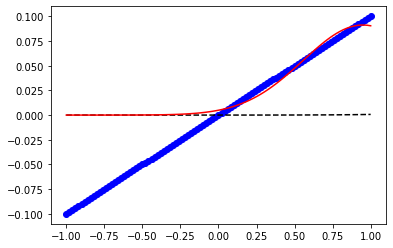

In [4]:
import matplotlib.pyplot as plt
from numpy import exp, loadtxt, pi, sqrt
import numpy as np
from lmfit import Model


x = np.linspace(-1., 1, 101)
y = np.linspace(-0.1, 0.1, 101)


def gaussian(x, amp, cen, wid):
    """1-d gaussian: gaussian(x, amp, cen, wid)"""
    return (amp / (sqrt(2*pi) * wid)) * exp(-(x-cen)**2 / (2*wid**2))


gmodel = Model(gaussian)
result = gmodel.fit(y, x=x, amp=5, cen=5, wid=1)

print(result.fit_report())

plt.plot(x, y, 'bo')
plt.plot(x, result.init_fit, 'k--')
plt.plot(x, result.best_fit, 'r-')
plt.show()
# <end examples/doc_model_gaussian.py>

In [6]:
from scipy import interpolate
import numpy as np
x = np.arange(-5.01, 5.01, 0.25)

y = np.arange(-5.01, 5.01, 0.25)

xx, yy = np.meshgrid(x, y)

z = np.sin(xx**2+yy**2)

f = interpolate.interp2d(x, y, z, kind='cubic')

print(np.shape(z), np.shape(x))

(41, 41) (41,)


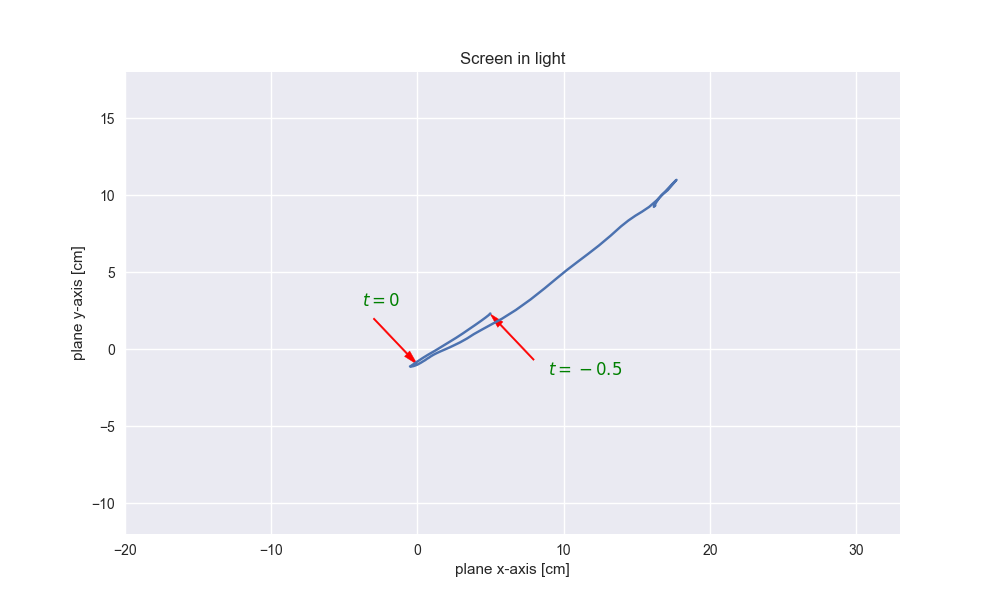

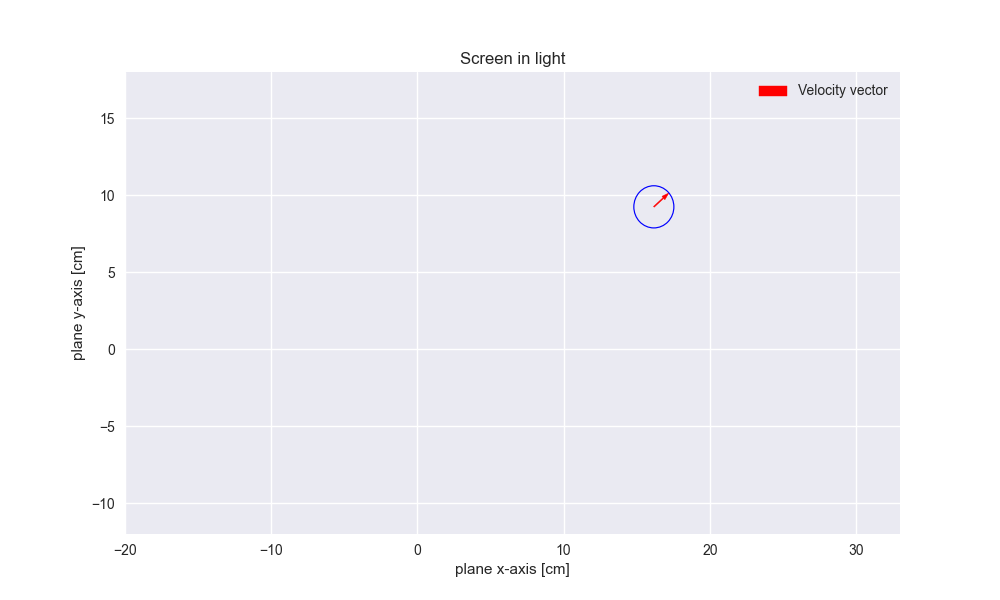

In [59]:
import os
import sys
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.mosh import *
from src.mosh import rot as R
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import csv
import random
import matplotlib
from matplotlib import animation
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
from matplotlib.animation import FuncAnimation
from itertools import count
from matplotlib import cm
%matplotlib widget
    

def plane_data(name, L):

    L_data1 = np.loadtxt('./dat/'+name+'/'+name+'_1.txt')
    L_data2 = np.loadtxt('./dat/'+name+'/'+name+'_4.txt')

    D_data1 = np.loadtxt('./dat/'+name+'/'+name+'_2.txt')
    D_data2 = np.loadtxt('./dat/'+name+'/'+name+'_3.txt')

    L_data = (L_data1 + L_data2)/2.
    D_data = (D_data1 + D_data2)/2.
    
    if L==True:
        data = L_data
    else:
        data = D_data

    roll = []
    pitch = []
    yaw = []

    for i in range(len(data[0])):

        yaw.append(float(data[0][i]))
        pitch.append(float(data[1][i]))
        roll.append(float(data[2][i])) 

    # print(roll)
    # print(pitch)
    # print(yaw)

    m = Symbol('m')

    p_0 = [1., 1., 1.]
    d = [1., 1., 0.]
    r_e_H = r_e_h(p_0, d, m)

    degree = True
    xs = []
    ys = []
    zs = []
    x0, y0 = 20.*np.sqrt(2), 20.*np.sqrt(2)

    for i in range(len(roll)):
        phi = roll[i]
        theta = pitch[i]
        psi = yaw[i]
        r = R(phi, theta, psi, degree)
        r_e_I = np.matmul(r, r_e_H)
        mul = solve_m(x0, y0, r_e_I, m)
    #     print(mul)
        r_e = lambdify(m, r_e_I)
        r_ = np.array(r_e(mul[m]))
        xs.append(r_[0][0])
        ys.append(r_[1][0])
        zs.append(r_[2][0])
    #     xs.append(0.)
    #     print(r_)

    # print(xs,'\n')
    # print(ys,'\n')
    # print(zs)

    # Rotating the plane
    rot_ang = np.arcsin(y0/np.sqrt(x0**2 + y0**2))
    # print(np.sin(rot_ang)**2)

    rot_ax = np.array([0., 0., 1.])
    # print(np.cross(rot_ax, v_in))

    x_p = []
    y_p = []

    for i in range(len(xs)):

        v_in = np.array([xs[i], ys[i], zs[i]])
        # print(v_in)

        v_fin = v_in*np.cos(rot_ang) + np.cross(rot_ax, v_in)*np.sin(rot_ang) + rot_ax*(np.dot(rot_ax, v_in))*(1 - np.cos(rot_ang))

        x_p.append(-v_fin[0]) #minus sign if looking from mouse perspective. 
        y_p.append(-v_fin[2]) #minus sign if looking from mouse perspective.
    
    vel = []
    
    for i in range(len(x_p)-1):
        u = 10*float(x_p[i+1]-x_p[i])
        v = 10*float(y_p[i+1]-y_p[i])
        vel.append(np.hypot(u,v))
#     vel.append(vel[-1]) # Just to make the dimensions of x_p, y_p and vel match
    return np.where(np.array(roll)==0.0)[0][0], x_p, y_p, vel

def velocity_ani_plot(x_p, y_p, L):
    if L==True:
        light = 'light'
    else:
        light = 'dark'
    
    fig2 = plt.figure(figsize=(10,6))
    axes = fig2.add_subplot(1,1,1)
    x, y, u, v = [], [], [], []
    def animate(i):
        if i<len(x_p)-1:
            x = x_p[i]
            y = y_p[i]
            u = 10*float(x_p[i+1]-x_p[i])
            v = 10*float(y_p[i+1]-y_p[i])
            axes.clear()
            axes.set_ylim(-12., 18.)
            axes.set_xlim(-20., 33)
            plt.style.use("seaborn")
            plt.xlabel('plane x-axis [cm]')
            plt.ylabel('plane y-axis [cm]')
            plt.title('Screen in '+light)
            plt.arrow(x, y, u, v, width=0.07, color='r', length_includes_head=True, head_width=0.3, head_length=0.5, label='Velocity vector')
            circ = plt.Circle((x, y), radius=np.hypot(u,v), color='b', fill=False, visible=True, lw=0.85)
            axes.add_artist(circ)
            plt.legend()
    #         plt.plot(x,y, scaley=True, scalex=True, color="blue")
    #         plt.quiver([x, y], u, v)

    ani = FuncAnimation(fig=fig2, func=animate, interval=20)
    f = r'./plots/animation_vector_field_'+light+'.gif'
    writergif = animation.PillowWriter(fps=15) 
    ani.save(f, writer=writergif)


name = 'NewM1_11_42'
L = True
if L==True:
    light = 'light'
else:
    light = 'dark'
ind, x_p, y_p, vel = plane_data(name, L)

# ind = np.where(np.array(roll)==0.0)[0][0]
fig1 = plt.figure(figsize=(10,6))
axes = fig1.add_subplot(1,1,1)
plt.style.use("seaborn")
# circ = plt.Circle((x_p[30], y_p[30]), radius=2., color='r', fill=False, visible=True, lw=0.85)
# axes.add_artist(circ)
plt.plot(x_p, y_p)
# plt.scatter(x_p, y_p, c=cm.hot(vel), edgecolor='none')
dx, dy = -3., -3.
plt.arrow(x_p[ind]+dx, y_p[ind]-dy, -dx, dy, width=0.1, color='r', length_includes_head=True, head_width=0.5, head_length=1.)
plt.text(x_p[ind]+dx-0.8, y_p[ind]-dy+0.8, r'$t = 0.$', color='green', size='large')
plt.arrow(x_p[0]-dx, y_p[0]+dy, +dx, -dy, width=0.1, color='r', length_includes_head=True, head_width=0.5, head_length=1.)
plt.text(x_p[0]-dx+1., y_p[0]+dy-1., r'$t = - 0.5$', color='green', size='large')
plt.xlabel('plane x-axis [cm]')
plt.ylabel('plane y-axis [cm]')
plt.title('Screen in '+light)
plt.ylim(-12., 18.)
plt.xlim(-20., 33)
plt.savefig('./plots/cell_' + light + '_' + name + '.svg', format='svg')
plt.savefig('./plots/cell_' + light + '_' + name + '.pdf', format='pdf')
# displaying the plot
plt.show()


# fig = plt.figure(figsize=(10,6))
# axes = fig.add_subplot(1,1,1)
# axes.set_ylim(-12., 18.)
# axes.set_xlim(-20., 33)
# plt.style.use("seaborn")
# x,y=[],[]

# def animate(i):
#     if i<len(x_p):
#         x.append(x_p[i]) 
#         y.append(y_p[i])
#         dx, dy = -3., -3.
#         plt.arrow(x_p[ind]+dx, y_p[ind]-dy, -dx, dy, width=0.1, color='r', length_includes_head=True, head_width=0.5, head_length=1.)
#         plt.text(x_p[ind]+dx-0.8, y_p[ind]-dy+0.8, r'$t = 0.$', color='green', size='large')
#         plt.arrow(x_p[0]+dx, y_p[0]-dy, -dx, +dy, width=0.1, color='r', length_includes_head=True, head_width=0.5, head_length=1.)
#         plt.text(x_p[0]+dx-1., y_p[0]-dy+1., r'$t = - 0.5$', color='green', size='large')
#         plt.xlabel('plane x-axis [cm]')
#         plt.ylabel('plane y-axis [cm]')
#         plt.title('Screen')
#         plt.plot(x,y, scaley=True, scalex=True, color="blue")

# ani = FuncAnimation(fig=fig, func=animate, interval=20)
# f = r'./plots/animation_Light_'+name+'.gif'
# writergif = animation.PillowWriter(fps=15) 
# ani.save(f, writer=writergif)

velocity_ani_plot(x_p, y_p, L)

/var/folders/93/sp1x4ytn2mj_zkqd4_1gfdqr0000gn/T/ipykernel_8023/1334065596.py:28: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


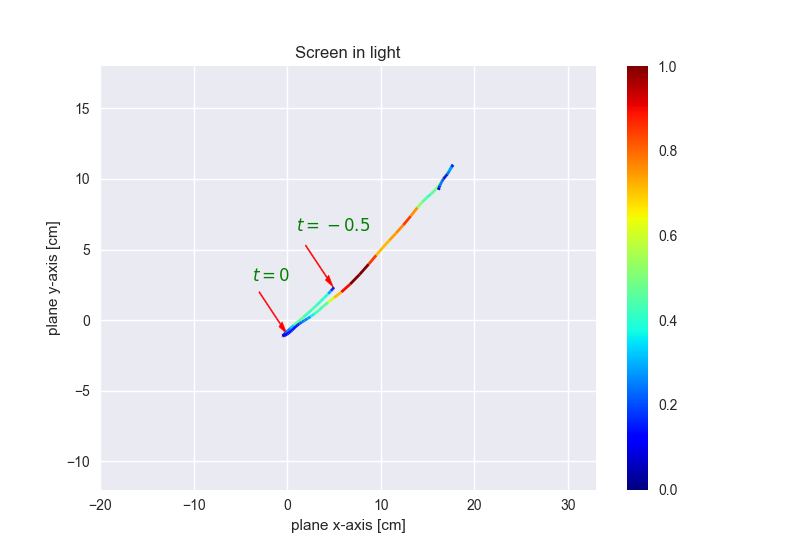

In [61]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

vel = np.array(vel)

def scale(x, out_range=(-1, 1)):
    domain = np.min(x), np.max(x)
    y = (x - (domain[1] + domain[0]) / 2) / (domain[1] - domain[0])
    return y * (out_range[1] - out_range[0]) + (out_range[1] + out_range[0]) / 2
vel = scale(vel, out_range=(0., 1.))
# x_p = np.array(x_p)
# y_p = np.array(y_p)
# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x_p, y_p]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, axs = plt.subplots(1, 1)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(np.min(vel), np.max(vel))
lc = LineCollection(segments, cmap='jet', norm=norm)
# Set the values used for colormapping
lc.set_array(vel)
lc.set_linewidth(2)
line = axs.add_collection(lc)
fig.colorbar(line, ax=axs)
dx, dy = -3., -3.
plt.arrow(x_p[ind]+dx, y_p[ind]-dy, -dx, dy, width=0.1, color='r', length_includes_head=True, head_width=0.5, head_length=1.)
plt.text(x_p[ind]+dx-0.8, y_p[ind]-dy+0.8, r'$t = 0.$', color='green', size='large')
plt.arrow(x_p[0]+dx, y_p[0]-dy, -dx, +dy, width=0.1, color='r', length_includes_head=True, head_width=0.5, head_length=1.)
plt.text(x_p[0]+dx-1., y_p[0]-dy+1., r'$t = - 0.5$', color='green', size='large')
plt.xlabel('plane x-axis [cm]')
plt.ylabel('plane y-axis [cm]')
plt.title('Screen in '+light)
axs.set_xlim(-20., 33)
axs.set_ylim(-12., 18.)
plt.savefig('./plots/cell_' + light + '_' + name + '.svg', format='svg')
plt.savefig('./plots/cell_' + light + '_' + name + '.pdf', format='pdf')
plt.show()

# Extracting the grating direction

[4.43240319010753 20.0000000000000 -3.30042937753378]
[4.32150296347576 20.0000000000000 -3.58630272111010]
[4.19064583494763 20.0000000000000 -3.69804515157545]
[4.03708611152622 20.0000000000000 -3.63624378943720]
[3.88727817788599 20.0000000000000 -3.48740358589620]
[3.85351281306727 20.0000000000000 -3.22399674853636]
[3.88112175276911 19.9999999999999 -2.80342416130725]
[3.84054209151317 20.0000000000000 -2.30468937392158]
[3.69251330017623 20.0000000000000 -1.91456433824301]
[3.48908287086180 20.0000000000001 -1.78121503464866]
[3.31630097586780 20.0000000000000 -1.65759087929156]
[3.16182030198386 20.0000000000000 -1.48116698764840]
[2.99611171144158 20.0000000000000 -1.23642513988305]
[2.84820176935432 20.0000000000000 -0.896496553372752]
[2.69216313167539 20.0000000000000 -0.718862115098885]
[2.53536683066984 20.0000000000000 -0.714628614645521]
[2.38768290059544 20.0000000000000 -0.788538963245700]
[2.19368872699736 20.0000000000000 -0.708645336886858]
[1.89632360204771 20.00

/var/folders/93/sp1x4ytn2mj_zkqd4_1gfdqr0000gn/T/ipykernel_50009/2845616850.py:37: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


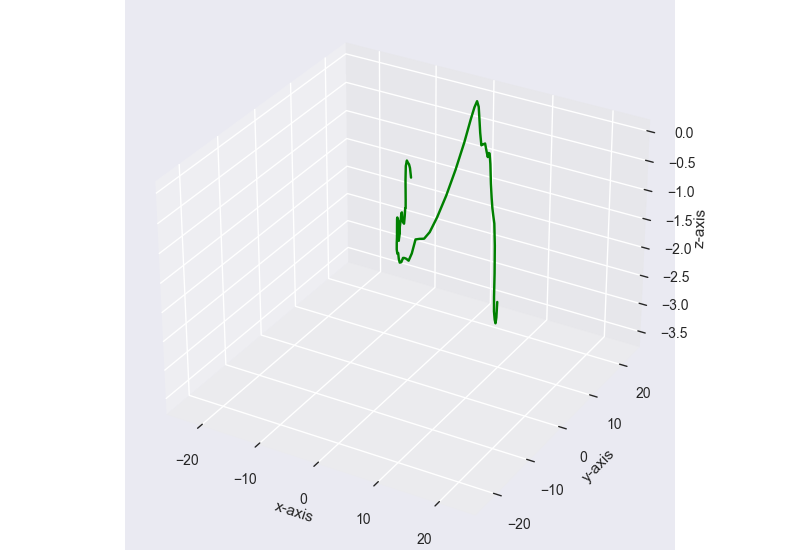

In [8]:
# Rotating the plane
rot_ang = np.arcsin(y0/np.sqrt(x0**2 + y0**2))
# print(np.sin(rot_ang)**2)

rot_ax = np.array([0., 0., 1.])
# print(np.cross(rot_ax, v_in))

xss = []
yss = []
zss = []

for i in range(len(xs)):
    
    v_in = np.array([xs[i], ys[i], zs[i]])
    # print(v_in)

    v_fin = v_in*np.cos(rot_ang) + np.cross(rot_ax, v_in)*np.sin(rot_ang) + rot_ax*(np.dot(rot_ax, v_in))*(1 - np.cos(rot_ang))
    
    print(v_fin)
    
    xss.append(v_fin[0])
    yss.append(v_fin[1])
    zss.append(v_fin[2])
    
# creating 3d plot using matplotlib 
# in python
  
# for creating a responsive plot
%matplotlib widget
  
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
  
# creating figure
fig = plt.figure()
ax = Axes3D(fig)

# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

# creating the plot
plot_geeks = ax.plot(xss, yss, zss, color='green')

plt.xlim([-25., 25.])
plt.ylim([-25., 25.])

# displaying the plot
plt.show()

# Inference 

In [23]:
from scipy import stats
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import seaborn as sns
import pandas as pd
from theano import shared
from sklearn import preprocessing

print('Running on PyMC3 v{}'.format(pm.__version__))
data = pd.read_csv('./renfe_small.csv')
# data.drop('Unnamed: 0', axis = 1, inplace=True)
data = data.sample(frac=0.01, random_state=99)
data.head(3)
data.isnull().sum()/len(data)

Running on PyMC3 v3.11.5


insert_date    0.000000
origin         0.000000
destination    0.000000
start_date     0.000000
end_date       0.000000
train_type     0.000000
price          0.096899
train_class    0.000000
fare           0.000000
dtype: float64

In [24]:
data['train_class'] = data['train_class'].fillna(data['train_class'].mode().iloc[0])
data['fare'] = data['fare'].fillna(data['fare'].mode().iloc[0])
data['price'] = data.groupby('fare').transform(lambda x: x.fillna(x.mean()))

/var/folders/93/sp1x4ytn2mj_zkqd4_1gfdqr0000gn/T/ipykernel_124/698425401.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  data['price'] = data.groupby('fare').transform(lambda x: x.fillna(x.mean()))
/var/folders/93/sp1x4ytn2mj_zkqd4_1gfdqr0000gn/T/ipykernel_124/698425401.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  data['price'] = data.groupby('fare').transform(lambda x: x.fillna(x.mean()))


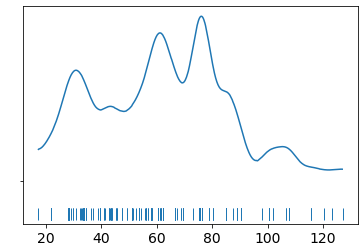

In [25]:
az.plot_kde(data['price'].values, rug=True)
plt.yticks([0], alpha=0);

In [26]:
with pm.Model() as model_g:
    μ = pm.Uniform('μ', lower=0, upper=300)
    σ = pm.HalfNormal('σ', sd=10)
    y = pm.Normal('y', mu=μ, sd=σ, observed=data['price'].values)
    trace_g = pm.sample(1000, tune=1000)

/Users/reza/anaconda3/envs/mosh/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/reza/anaconda3/envs/mosh/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


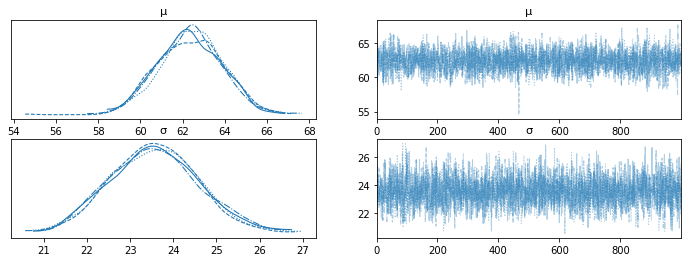

In [27]:
az.plot_trace(trace_g);

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/reza/anaconda3/envs/mosh/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


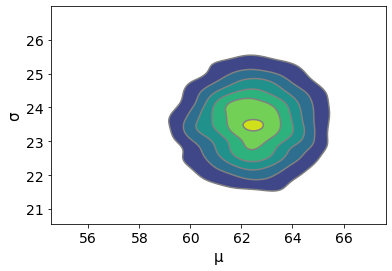

In [28]:
az.plot_pair(trace_g, kind='kde', fill_last=False);

In [29]:
az.summary(trace_g)

Got error No model on context stack. trying to find log_likelihood in translation.


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
μ  62.372  1.499  59.644   65.085      0.025    0.018    3554.0    2930.0   
σ  23.570  1.018  21.617   25.434      0.017    0.012    3523.0    2778.0   

   r_hat  
μ    1.0  
σ    1.0

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/reza/anaconda3/envs/mosh/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'μ'}>,
       <AxesSubplot:title={'center':'σ'}>], dtype=object)

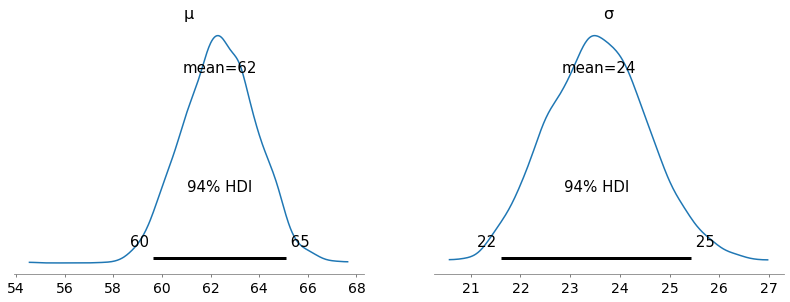

In [30]:
az.plot_posterior(trace_g)

In [31]:
pm.gelman_rubin(trace_g)

AttributeError: module 'pymc3' has no attribute 'gelman_rubin'

# Tests

In [6]:
# Rotation matrix test
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.mosh import rot as R

phi = 0.1
theta = 0.
psi = 0.
degree = False

print(R(phi, theta, psi, degree))

[[ 1.          0.          0.        ]
 [ 0.          0.99500417 -0.09983342]
 [ 0.          0.09983342  0.99500417]]


In [78]:
# Test to check the points are in the plane.

3.2*(0.685714285714286 + 3.57514652988308) + 1.2*(1.37142857142857 - 12.7337240796882)

1.5987211554602254e-14